In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline

In [3]:
df = pd.read_csv("amazon_cells_labelled.txt", delimiter="\t", header=None, names=["review", "sentiment"])
df

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [20]:
#we want to set up what we would think would be "good" sentiment words
keywords = ["good", "great", "highly recommend", "helpful", "love", "best", "excellent", "impressed", "must have", "value"]

for key in keywords:
    df[str(key)] = df.review.str.contains(
        " " + str(key),
        case=False
    )

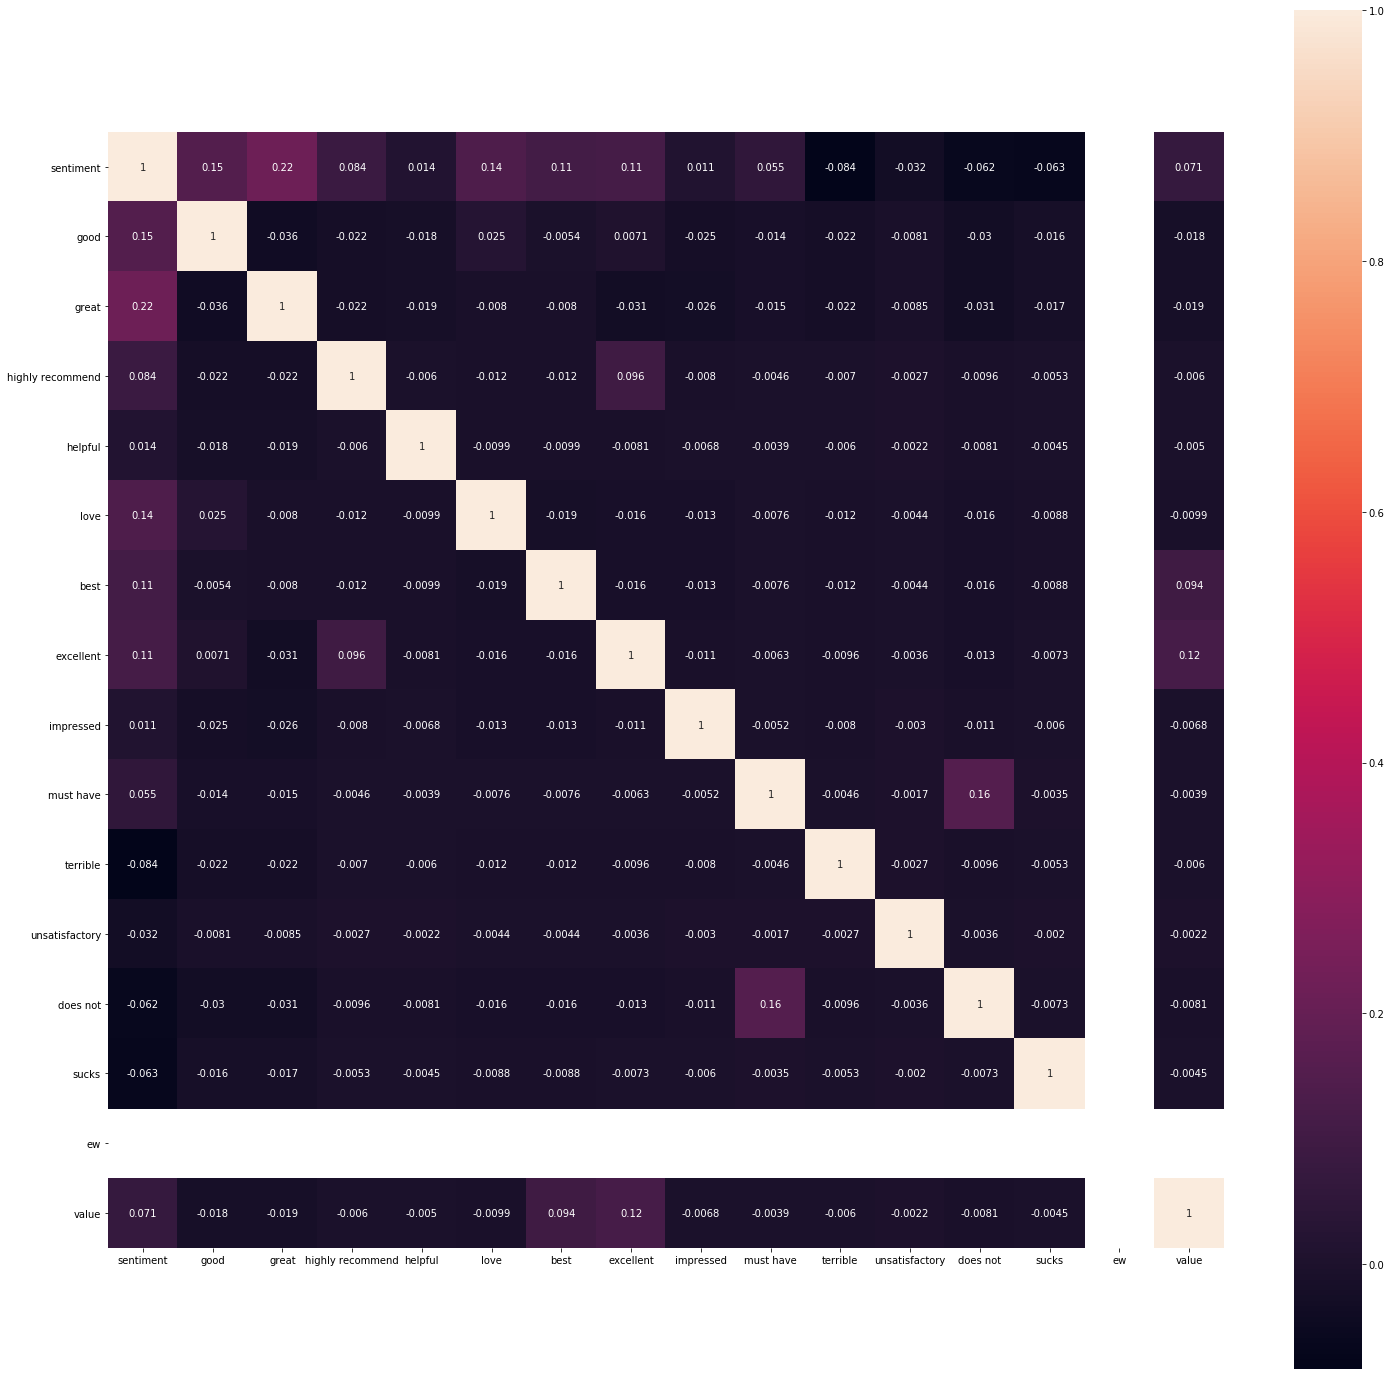

In [21]:
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, square=True)

In [26]:
data = df[keywords]
target = df["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(data, target)
#why y pred?
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 357


### most of our errors were type 2 errors

In [27]:
#with a holdout group
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.3)

print("with 30% holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("testing on sample: " + str(bnb.fit(data, target).score(data,target)))

#let's introduce the confusion matrix to see what type of errors we are getting
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

with 30% holdout: 0.643333333333
testing on sample: 0.643


array([[479,  21],
       [336, 164]], dtype=int64)

### there may be some overfitting

In [28]:
#let's try cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(bnb, data, target, cv=10)

array([ 0.67,  0.65,  0.68,  0.64,  0.65,  0.65,  0.61,  0.65,  0.63,  0.56])

In [29]:
#what would happen if we added negative keywords? 
keywords = ["ew", "terrible", "unsatisfactory", "does not", "sucks", "waste"]

for key in keywords:
    df[str(key)] = df.review.str.contains(
        " " + str(key),
        case=False
    )

In [30]:
data = df[keywords]
target = df["sentiment"]
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(data, target)
#why y pred?
y_pred = bnb.predict(data)

#with a holdout group
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.3)

print("with 30% holdout: " + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print("testing on sample: " + str(bnb.fit(data, target).score(data,target)))

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

#let's try cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(bnb, data, target, cv=10)

with 30% holdout: 0.476666666667
testing on sample: 0.533
Number of mislabeled points out of a total 1000 points : 467


array([ 0.52,  0.54,  0.55,  0.54,  0.5 ,  0.54,  0.56,  0.5 ,  0.54,  0.53])

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[ 36, 464],
       [  3, 497]], dtype=int64)